In [1]:
import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model  import LinearRegression



 
df = pd.read_csv("D:\\project\\insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.shape

(1338, 7)

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

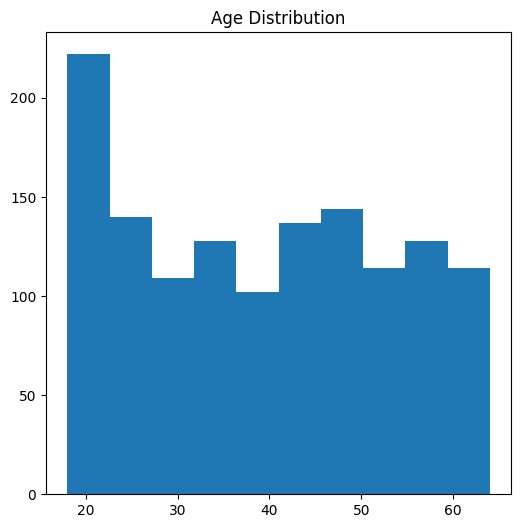

In [6]:

plt.figure(figsize=(6,6))
plt.hist(df['age'])
plt.title("Age Distribution")
plt.show()

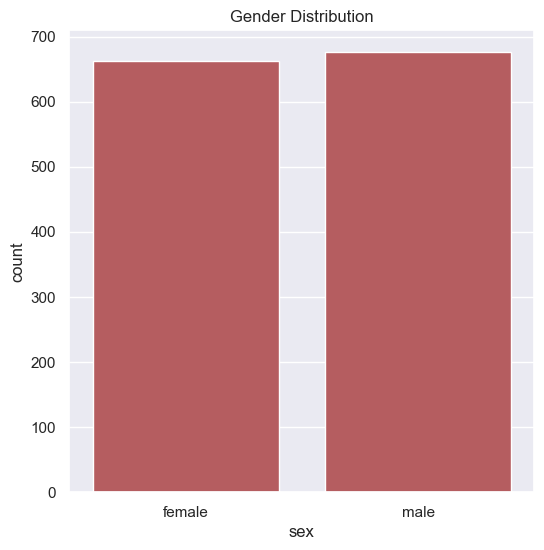

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data = df,color="r")
plt.title("Gender Distribution")
plt.show()

In [8]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\lathe\AppData\Local\Temp\ipykernel_11876\796321199.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


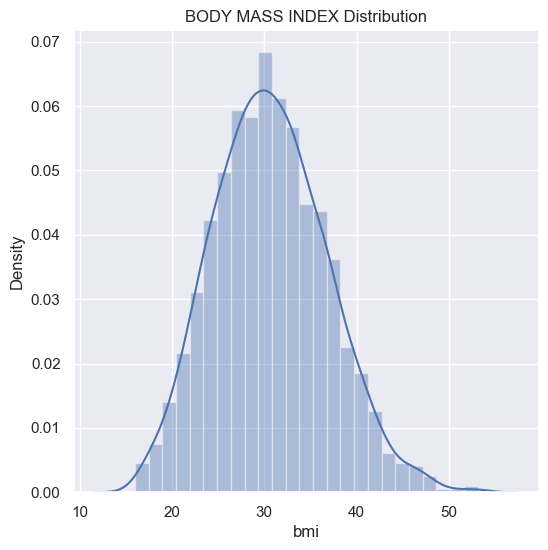

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("BODY MASS INDEX Distribution")
plt.show()

In [22]:
df.replace({
    "sex": {"male": 0, "female": 1},
    "smoker": {"yes": 0, "no": 1},
    "region": {"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}
}, inplace=True)

df = df.infer_objects(copy=False)


In [23]:
x=df.drop(columns="charges",axis=1)
y=df["charges"]

In [24]:
#Spliting the data into training and testing

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
print(x.shape,x_train.shape)

(1338, 6) (1070, 6)


In [35]:
regr = LinearRegression()

In [36]:
regr.fit(x_train,y_train)

LinearRegression()

In [41]:
train_data_predict = regr.predict(x_train)

In [45]:
from sklearn.metrics import r2_score

r2train = r2_score(y_train,train_data_predict)

print(f'R2 score : {r2train}')

R2 score : 0.7417049283233981


In [48]:
test_data_predict = regr.predict(x_test)


In [51]:
r2test = r2_score(y_test,test_data_predict)

print(f'R2 score : {r2test}')

R2 score : 0.7833463107364539


In [66]:
input_data = np.array([[32,0,28.880,0,1,2]])  
prediction = regr.predict(input_data)
print("Prediction:", prediction)

Prediction: [5686.48760657]


C:\Users\lathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
